In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Suicidios.csv')
df=pd.DataFrame(data)
df.head()

#Exploración de datos

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [2]:
df.rename(columns = {' gdp_for_year ($) ':'gdp_for_year'},inplace=True)
df.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
df['gdp_for_year']=df['gdp_for_year'].str.replace(',','')

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [6]:
df['gdp_for_year']=df.gdp_for_year.astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
gdp_for_year          27820 non-null int64
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [8]:
df['country'].value_counts().head(40)

Mauritius            382
Netherlands          382
Austria              382
Iceland              382
Ecuador              372
Mexico               372
Luxembourg           372
Chile                372
Japan                372
Republic of Korea    372
United States        372
Brazil               372
Italy                372
Greece               372
Malta                372
Argentina            372
Singapore            372
Spain                372
Colombia             372
Israel               372
Belgium              372
United Kingdom       372
Puerto Rico          372
Costa Rica           360
Australia            360
Bulgaria             360
Norway               360
France               360
Guatemala            360
Ireland              360
Sweden               358
Finland              348
Canada               348
New Zealand          348
Turkmenistan         348
Saint Lucia          336
Suriname             336
Uruguay              336
Ukraine              336
Belize               336


In [9]:
df['age'].value_counts()

55-74 years    4642
25-34 years    4642
15-24 years    4642
35-54 years    4642
75+ years      4642
5-14 years     4610
Name: age, dtype: int64

In [10]:
df.info()
#No tengo nulos en las columnas que me interesan. LOs números están en formato int.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
gdp_for_year          27820 non-null int64
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [11]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


In [12]:
#LImpieza de datos. 
df.columns = df.columns.str.strip()

In [13]:
df.drop(['population','suicides/100k pop','country-year', 'HDI for year','gdp_per_capita ($)', 'generation'], axis=1, inplace=True)
#df1=df.loc[df.country=='Spain']
#df1df.head()

In [14]:
df.head()

,country,year,sex,age,suicides_no,gdp_for_year
0,Albania,1987,male,15-24 years,21,2156624900
1,Albania,1987,male,35-54 years,16,2156624900
2,Albania,1987,female,15-24 years,14,2156624900
3,Albania,1987,male,75+ years,1,2156624900
4,Albania,1987,male,25-34 years,9,2156624900


In [15]:
# df1=df.loc[df.country=='Spain']
# df1

df1=df.query("country=='Spain' | country=='Germany' | country=='France' | country=='Italy' | country=='Belgium'| country=='Denmark'| country=='Croatia'| country=='Finland'| country=='Slovakia'| country=='Greece'| country=='Austria' | country=='Bulgary'| country=='Slovenia'| country=='Estonia' | country=='Hungary'| country=='Ireland' | country=='Poland'| country=='Portugal' | country=='Netherlands'| country=='Romania'| country=='Sweden'| country=='Czech Republic'")
df1.head(50)

#df1=df.loc[(df['country']=='Spain') & (df['country']=='Albania')]
#df1
#df1=df.loc[df.country=='Spain']
#df1
#df4=df3.loc[(df3['year'] >=2005) & (df3['year'] <=2015)]

,country,year,sex,age,suicides_no,gdp_for_year
1786,Austria,1985,male,75+ years,152,69386774475
1787,Austria,1985,male,55-74 years,355,69386774475
1788,Austria,1985,male,35-54 years,515,69386774475
1789,Austria,1985,male,25-34 years,232,69386774475
1790,Austria,1985,female,75+ years,110,69386774475
1791,Austria,1985,male,15-24 years,207,69386774475
1792,Austria,1985,female,55-74 years,220,69386774475
1793,Austria,1985,female,35-54 years,186,69386774475
1794,Austria,1985,female,25-34 years,56,69386774475
1795,Austria,1985,female,15-24 years,50,69386774475


In [16]:
#INtenté sacar un multindice pero no fue buena idea. Iterar indice columna no era tan fácil.
#df1.set_index(['country', 'year'], inplace=True)
#df1

In [17]:
#df1.loc['Spain', (2006,2007,2008,2009,2010,2011,2012,2013,2014), :]
#df1.loc[('Spain', 2000), :]


In [18]:
# df1.groupby(['country', 'year']).sum()
#NO entiendo por qué no lo hace.
#df2 = df1.groupby(['country', 'year']).agg(sum)
#df3 = pd.merge(df1, df2, on=['country', 'year'], how='inner')
#df3.head()

In [19]:

df2=df1.groupby(['country','year', 'gdp_for_year'])['suicides_no'].sum().reset_index()
df3=df2[['country','year','suicides_no','gdp_for_year']]
df3

#suicidios_por_año=[]
#sumatorio=0
##my_dict={}
#for index, row in df1.iterrows():
    #my_dict[row['year']] = my_dict.get(row['year'], 0) + row['suicides_no']
    
    
    
       # sumatorio+=row['suicides_no']
        #suicidios_por_año.insert(index,)
        #suicidios_por_año.append(sum(row['suicides_no']))
#print(my_dict)
    #for y in df1.suicides_no:
      #  
        #    
#print(suicidios_por_año)



            

,country,year,suicides_no,gdp_for_year
0,Austria,1985,2091,69386774475
1,Austria,1986,2139,99036165210
2,Austria,1987,2069,124168442860
3,Austria,1988,1851,133339397080
4,Austria,1989,1898,133105805928
5,Austria,1990,1825,166463386663
6,Austria,1991,1769,173794177725
7,Austria,1992,1759,195078126346
8,Austria,1993,1704,190379720927
9,Austria,1994,1776,203535242742


In [20]:
df3['country'].unique()

array(['Austria', 'Belgium', 'Croatia', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden'], dtype=object)

In [21]:
suicide_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
bins = pd.qcut(df3['suicides_no'],5, labels=suicide_labels)
bins.head(10)

0        High
1        High
2        High
3    Moderate
4        High
5    Moderate
6    Moderate
7    Moderate
8    Moderate
9    Moderate
Name: suicides_no, dtype: category
Categories (5, object): [Very Low < Low < Moderate < High < Very High]

In [22]:
#selected=input('Hi, we are an app that deals with suicide data within the EU. Please, enter a Country of the UE and we will give you the correlation between number of suicides and the evolution of the gdp')

In [23]:
df4=df3.loc[df3.country=='Spain']
df4.head()
#df4=df3.loc[df3.country=='selected']
#df4.head()

,country,year,suicides_no,gdp_for_year
512,Spain,1985,2514,180302412231
513,Spain,1986,2755,250638463467
514,Spain,1987,2804,317882187037
515,Spain,1988,2960,375138723325
516,Spain,1989,2987,413630538018


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/eduardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


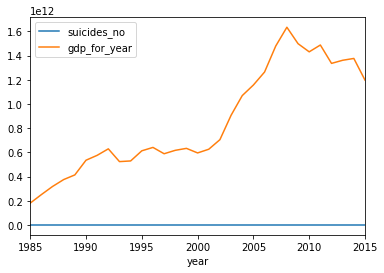

In [48]:
df4.sort_values(by=['year', 'gdp_for_year', 'suicides_no'], inplace=True)
df4.plot(x='year', y=['suicides_no','gdp_for_year'])

In [24]:
data1 = pd.read_csv('poblacion_mundial.csv')
df5=pd.DataFrame(data1)
df5.head(100)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,1.052640e+05,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,2.254955e+07,2.336913e+07,2.421856e+07,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07,2.881346e+07,2.978419e+07,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04,NaN
5,Arab World,ARB,"Population, total",SP.POP.TOTL,92490932.0,95044497.0,97682294.0,100411076.0,103239902.0,106174988.0,...,3.481451e+08,3.565089e+08,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,4.144919e+08,NaN
6,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,92634.0,101078.0,112472.0,125566.0,138529.0,150362.0,...,7.666393e+06,8.270684e+06,8.672475e+06,8.900453e+06,9.006263e+06,9.070867e+06,9.154302e+06,9.269612e+06,9.400145e+06,NaN
7,Argentina,ARG,"Population, total",SP.POP.TOTL,20619075.0,20953077.0,21287682.0,21621840.0,21953929.0,22283390.0,...,4.079941e+07,4.122389e+07,4.165688e+07,4.209674e+07,4.253992e+07,4.298152e+07,4.341776e+07,4.384743e+07,4.427104e+07,NaN
8,Armenia,ARM,"Population, total",SP.POP.TOTL,1874120.0,1941491.0,2009526.0,2077575.0,2144998.0,2211316.0,...,2.888584e+06,2.877311e+06,2.875581e+06,2.881922e+06,2.893509e+06,2.906220e+06,2.916950e+06,2.924816e+06,2.930450e+06,NaN
9,American Samoa,ASM,"Population, total",SP.POP.TOTL,20013.0,20486.0,21117.0,21882.0,22698.0,23520.0,...,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04,NaN


In [25]:
df5.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [26]:
df5.rename(columns = {'Country Name':'Country'},inplace=True)
df5.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [27]:
df6=df5.query("Country=='Spain' | Country=='Germany' | Country=='France' | Country=='Italy' | Country=='Belgium'| Country=='Denmark'| Country=='Croatia'| Country=='Finland'| Country=='Slovakia'| Country=='Greece'| Country=='Austria' | Country=='Bulgary'| Country=='Slovenia'| Country=='Estonia' | Country=='Hungary'| Country=='Ireland' | Country=='Poland'| Country=='Portugal' | Country=='Netherlands'| Country=='Romania'| Country=='Sweden'| Country=='Czech Republic'")
df6

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
12,Austria,AUT,"Population, total",SP.POP.TOTL,7047539.0,7086299.0,7129864.0,7175811.0,7223801.0,7270889.0,...,8343323.0,8363404.0,8391643.0,8429991.0,8479823.0,8546356.0,8642699.0,8736668.0,8797566.0,NaN
15,Belgium,BEL,"Population, total",SP.POP.TOTL,9153489.0,9183948.0,9220578.0,9289770.0,9378113.0,9463667.0,...,10796493.0,10895586.0,11038264.0,11106932.0,11159407.0,11209057.0,11274196.0,11331422.0,11382393.0,NaN
52,Czech Republic,CZE,"Population, total",SP.POP.TOTL,9602006.0,9586651.0,9624660.0,9670685.0,9727804.0,9779358.0,...,10443936.0,10474410.0,10496088.0,10510785.0,10514272.0,10525347.0,10546059.0,10566332.0,10594438.0,NaN
53,Germany,DEU,"Population, total",SP.POP.TOTL,72814900.0,73377632.0,74025784.0,74714353.0,75318337.0,75963695.0,...,81902307.0,81776930.0,80274983.0,80425823.0,80645605.0,80982500.0,81686611.0,82348669.0,82685827.0,NaN
56,Denmark,DNK,"Population, total",SP.POP.TOTL,4579603.0,4611687.0,4647727.0,4684483.0,4722072.0,4759012.0,...,5523095.0,5547683.0,5570572.0,5591572.0,5614932.0,5643475.0,5683483.0,5728010.0,5764980.0,NaN
68,Spain,ESP,"Population, total",SP.POP.TOTL,30455000.0,30739250.0,31023366.0,31296651.0,31609195.0,31954292.0,...,46362946.0,46576897.0,46742697.0,46773055.0,46620045.0,46480882.0,46444832.0,46483569.0,46593171.0,NaN
69,Estonia,EST,"Population, total",SP.POP.TOTL,1211537.0,1225077.0,1241623.0,1258857.0,1277086.0,1294566.0,...,1334515.0,1331475.0,1327439.0,1322696.0,1317997.0,1314545.0,1315407.0,1315790.0,1317384.0,NaN
73,Finland,FIN,"Population, total",SP.POP.TOTL,4429634.0,4461005.0,4491443.0,4523309.0,4548543.0,4563732.0,...,5338871.0,5363352.0,5388272.0,5413971.0,5438972.0,5461512.0,5479531.0,5495303.0,5508214.0,NaN
75,France,FRA,"Population, total",SP.POP.TOTL,46814237.0,47444751.0,48119649.0,48803680.0,49449403.0,50023774.0,...,64707044.0,65027507.0,65342775.0,65659789.0,65998660.0,66316092.0,66593366.0,66859768.0,67105513.0,NaN
87,Greece,GRC,"Population, total",SP.POP.TOTL,8331725.0,8398050.0,8448233.0,8479625.0,8510429.0,8550333.0,...,11107017.0,11121341.0,11104899.0,11045011.0,10965211.0,10892413.0,10820883.0,10775971.0,10753531.0,NaN


In [28]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 12 to 221
Data columns (total 63 columns):
Country           20 non-null object
Country Code      20 non-null object
Indicator Name    20 non-null object
Indicator Code    20 non-null object
1960              20 non-null float64
1961              20 non-null float64
1962              20 non-null float64
1963              20 non-null float64
1964              20 non-null float64
1965              20 non-null float64
1966              20 non-null float64
1967              20 non-null float64
1968              20 non-null float64
1969              20 non-null float64
1970              20 non-null float64
1971              20 non-null float64
1972              20 non-null float64
1973              20 non-null float64
1974              20 non-null float64
1975              20 non-null float64
1976              20 non-null float64
1977              20 non-null float64
1978              20 non-null float64
1979              20 non-

In [29]:
lista=['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
for b in lista:
    df6[b]= df6[b].astype(int)
df6.info()

/home/eduardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 12 to 221
Data columns (total 63 columns):
Country           20 non-null object
Country Code      20 non-null object
Indicator Name    20 non-null object
Indicator Code    20 non-null object
1960              20 non-null int64
1961              20 non-null int64
1962              20 non-null int64
1963              20 non-null int64
1964              20 non-null int64
1965              20 non-null int64
1966              20 non-null int64
1967              20 non-null int64
1968              20 non-null int64
1969              20 non-null int64
1970              20 non-null int64
1971              20 non-null int64
1972              20 non-null int64
1973              20 non-null int64
1974              20 non-null int64
1975              20 non-null int64
1976              20 non-null int64
1977              20 non-null int64
1978              20 non-null int64
1979              20 non-null int64
1980              20 non-nu

df6.info()

In [30]:
df6.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
12,Austria,AUT,"Population, total",SP.POP.TOTL,7047539,7086299,7129864,7175811,7223801,7270889,...,8343323,8363404,8391643,8429991,8479823,8546356,8642699,8736668,8797566,NaN
15,Belgium,BEL,"Population, total",SP.POP.TOTL,9153489,9183948,9220578,9289770,9378113,9463667,...,10796493,10895586,11038264,11106932,11159407,11209057,11274196,11331422,11382393,NaN
52,Czech Republic,CZE,"Population, total",SP.POP.TOTL,9602006,9586651,9624660,9670685,9727804,9779358,...,10443936,10474410,10496088,10510785,10514272,10525347,10546059,10566332,10594438,NaN
53,Germany,DEU,"Population, total",SP.POP.TOTL,72814900,73377632,74025784,74714353,75318337,75963695,...,81902307,81776930,80274983,80425823,80645605,80982500,81686611,82348669,82685827,NaN
56,Denmark,DNK,"Population, total",SP.POP.TOTL,4579603,4611687,4647727,4684483,4722072,4759012,...,5523095,5547683,5570572,5591572,5614932,5643475,5683483,5728010,5764980,NaN


In [31]:
df6.drop(['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984'], axis=1, inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [32]:
df6.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [33]:
df6.head()

,Country,Country Code,1985,1986,1987,1988,1989,1990,1991,1992,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
12,Austria,AUT,7564985,7569794,7574586,7585317,7619567,7677850,7754891,7840709,...,8343323,8363404,8391643,8429991,8479823,8546356,8642699,8736668,8797566,NaN
15,Belgium,BEL,9858308,9861823,9870234,9901664,9937697,9967379,10004486,10045158,...,10796493,10895586,11038264,11106932,11159407,11209057,11274196,11331422,11382393,NaN
52,Czech Republic,CZE,10337118,10342227,10347318,10355276,10361068,10333355,10308578,10319123,...,10443936,10474410,10496088,10510785,10514272,10525347,10546059,10566332,10594438,NaN
53,Germany,DEU,77684873,77720436,77839920,78144619,78751283,79433029,80013896,80624598,...,81902307,81776930,80274983,80425823,80645605,80982500,81686611,82348669,82685827,NaN
56,Denmark,DNK,5113691,5120534,5127024,5129516,5132594,5140939,5154298,5171370,...,5523095,5547683,5570572,5591572,5614932,5643475,5683483,5728010,5764980,NaN


In [34]:
df6.T.T
#suicidios_por_año=[]
#sumatorio=0
##my_dict={}
#for index, row in df1.iterrows():
    #my_dict[row['year']] = my_dict.get(row['year'], 0) + row['suicides_no']
    
    
    
       # sumatorio+=row['suicides_no']
        #suicidios_por_año.insert(index,)
        #suicidios_por_año.append(sum(row['suicides_no']))
#print(my_dict)
    #for y in df1.suicides_no:
      #  
        #    
#print(suicidios_por_año)

,Country,Country Code,1985,1986,1987,1988,1989,1990,1991,1992,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
12,Austria,AUT,7564985,7569794,7574586,7585317,7619567,7677850,7754891,7840709,...,8343323,8363404,8391643,8429991,8479823,8546356,8642699,8736668,8797566,NaN
15,Belgium,BEL,9858308,9861823,9870234,9901664,9937697,9967379,10004486,10045158,...,10796493,10895586,11038264,11106932,11159407,11209057,11274196,11331422,11382393,NaN
52,Czech Republic,CZE,10337118,10342227,10347318,10355276,10361068,10333355,10308578,10319123,...,10443936,10474410,10496088,10510785,10514272,10525347,10546059,10566332,10594438,NaN
53,Germany,DEU,77684873,77720436,77839920,78144619,78751283,79433029,80013896,80624598,...,81902307,81776930,80274983,80425823,80645605,80982500,81686611,82348669,82685827,NaN
56,Denmark,DNK,5113691,5120534,5127024,5129516,5132594,5140939,5154298,5171370,...,5523095,5547683,5570572,5591572,5614932,5643475,5683483,5728010,5764980,NaN
68,Spain,ESP,38469512,38584624,38684815,38766939,38827764,38867322,38966376,39157685,...,46362946,46576897,46742697,46773055,46620045,46480882,46444832,46483569,46593171,NaN
69,Estonia,EST,1528781,1540190,1552221,1561900,1568131,1569174,1561314,1533091,...,1334515,1331475,1327439,1322696,1317997,1314545,1315407,1315790,1317384,NaN
73,Finland,FIN,4902206,4918154,4932123,4946481,4964371,4986431,5013740,5041992,...,5338871,5363352,5388272,5413971,5438972,5461512,5479531,5495303,5508214,NaN
75,France,FRA,56795686,57132691,57482591,57836486,58182702,58512808,58559311,58851217,...,64707044,65027507,65342775,65659789,65998660,66316092,66593366,66859768,67105513,NaN
87,Greece,GRC,9934300,9967213,10000595,10036983,10089498,10196792,10319927,10399061,...,11107017,11121341,11104899,11045011,10965211,10892413,10820883,10775971,10753531,NaN


In [35]:
df6.drop(['2016', '2017','2018'], axis=1, inplace=True)

In [41]:
df6.groupby(['Country'])

In [42]:
df6.head()

,Country,Country Code,1985,1986,1987,1988,1989,1990,1991,1992,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
12,Austria,AUT,7564985,7569794,7574586,7585317,7619567,7677850,7754891,7840709,...,8268641,8295487,8321496,8343323,8363404,8391643,8429991,8479823,8546356,8642699
15,Belgium,BEL,9858308,9861823,9870234,9901664,9937697,9967379,10004486,10045158,...,10547958,10625700,10709973,10796493,10895586,11038264,11106932,11159407,11209057,11274196
52,Czech Republic,CZE,10337118,10342227,10347318,10355276,10361068,10333355,10308578,10319123,...,10238905,10298828,10384603,10443936,10474410,10496088,10510785,10514272,10525347,10546059
53,Germany,DEU,77684873,77720436,77839920,78144619,78751283,79433029,80013896,80624598,...,82376451,82266372,82110097,81902307,81776930,80274983,80425823,80645605,80982500,81686611
56,Denmark,DNK,5113691,5120534,5127024,5129516,5132594,5140939,5154298,5171370,...,5437272,5461438,5493621,5523095,5547683,5570572,5591572,5614932,5643475,5683483
